<center>

## Aprendizaje No Supervisado DiploDatos

## Agrupamiento con el FIFA 2022 dataset

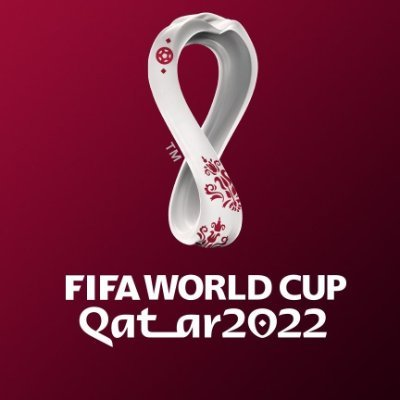

**Grupo 28**<br>
Docente: Laura Montes

Integrantes:

- Gustavo Alvarez Lupu<br>
- Laura Hayas<br>
- Maria Emilia Santacruz<br>
- Nicolás Ambrosis

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn import decomposition
from sklearn.cluster import MeanShift

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn.manifold import TSNE

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) como https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset 'data.csv'.** 

In [3]:
df = pd.read_excel('data_22.xlsx',sheet_name='FIFA_22') #openxls)

In [4]:
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age        dob  height_cm  \
0       93         93   78000000.0  320000.0   34 1987-06-24        170   
1       92         92  119500000.0  270000.0   32 1988-08-21        185   
2       91         91   45000000.0  270000.0   36 1985-02-05        187   
3       91         91  129000000.0  270000.0   29 1992-02-05        175   
4       91         91  125500000.0  350000.0   30 1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...

In [5]:
df.tail(4)

sofifa_id                                         player_url  \
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                long_name player_positions  overall  \
19235           C. Porter          Caoimhin Porter               CM       47   
19236            N. Logue  Nathan Logue-Cunningham               CM       47   
19237           L. Rudden              Luke Rudden               ST       47   
19238  E. Lalchhanchhuaha  Emanuel Lalchhanchhuaha              CAM       47   

       potential  value_eur  wage_eur  age        dob  height_cm  weight_kg  \
19235         59   110000.0     500.0   19 2002-03-18        175         70   
19236         55   100000.0     500.0   21 2000-02-07        178         72   
19237         60   110000.0     500.0   19 2002-04-23        173         66   
19238         60   110000.0     500.0   19 2002-02-06        167         61   

       club_team_id            club_name                     league_name  \
19235         445.0           Derry City  Rep. Ireland Airtricity League   
19236      111131.0           Finn Harps  Rep. Ireland Airtricity League   
19237      111131.0           Finn Harps  Rep. Ireland Airtricity League   
19238      113040.0  NorthEast United FC             Indian Super League   

       league_level club_position  club_jersey_number club_loaned_from  \
19235           1.0           RES                27.0              NaN   
19236           1.0           RES                31.0              NaN   
19237           1.0           RES                12.0              NaN   
19238           1.0           SUB                13.0              NaN   

      club_joined  club_contract_valid_until  nationality_id  \
19235  2021-02-22                     2021.0              25   
19236  2021-06-18                     2021.0              25   
19237  2021-06-18                     2021.0              25   
19238  2021-08-31                     2025.0             159   

          nationality_name  nation_team_id nation_position  \
19235  Republic of Ireland             NaN             NaN   
19236  Republic of Ireland             NaN             NaN   
19237  Republic of Ireland             NaN             NaN   
19238                India             NaN             NaN   

       nation_jersey_number preferred_foot  weak_foot  skill_moves  \
19235                   NaN          Right          3            2   
19236                   NaN          Right          3            2   
19237                   NaN          Right          3            2   
19238                   NaN          Right          3            2   

       international_reputation      work_rate       body_type real_face  \
19235                         1  Medium/Medium  Lean (170-185)        No   
19236                         1  Medium/Medium  Lean (170-185)        No   
19237                         1  Medium/Medium  Lean (170-185)        No   
19238                         1  Medium/Medium     Lean (170-)        No   

       release_clause_eur player_tags player_traits  pace  shooting  passing  \
19235            193000.0         NaN           NaN  59.0      39.0     50.0   
19236            175000.0         NaN           NaN  60.0      37.0     45.0   
19237            239000.0         NaN           NaN  68.0      46.0     36.0   
19238            217000.0         NaN           NaN  68.0      38.0     45.0   

       dribbling  defending  physic  attacking_crossing  attacking_finishing  \
19235       46.0       41.0    51.0                  54                   33   
19236       49.0       41.0    52.0                  39                   32   
19237       48.0       15.0    42.0                  29                   49   
19238       48.0 

In [6]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [7]:
print(df.columns)
print(len(df.columns), 'variables')

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110 variables


In [8]:
df.shape

(19239, 110)

In [9]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

tipos de variables:

In [10]:
#completar

In [11]:
print(df.attacking_crossing)

0        85
1        71
2        87
3        85
4        94
         ..
19234    46
19235    54
19236    39
19237    29
19238    39
Name: attacking_crossing, Length: 19239, dtype: int64


89
[85 71 87 94 13 78 15 18 80 68 75 14 83 58 53 79 20 91 17 12 66 88 73 11
 47 70 86 55 77 82 92 54 63 65 62 30 42 81 69 74 40 60 44 16 76 49 84 64
 56 52 72 57 22 51 35 45 24 50 67  9 27 25 59 10 46 38 19 36 34 48 39 61
 89 90 29 41 43  8 37 32 28 23 31 21 33 26  7  6]


<AxesSubplot:>

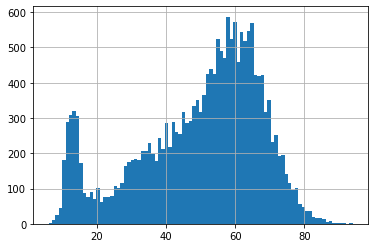

In [12]:
print(df.attacking_crossing.max()-df.attacking_crossing.min()+1)
nbins=89
print(df['attacking_crossing'].unique())
df['attacking_crossing'].hist(bins = nbins)

In [13]:
print(df.overall)

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

47


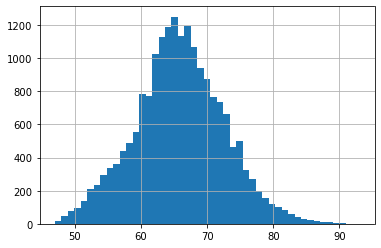

In [14]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

Mejores jugadores por posición:

In [15]:
print(df['player_positions'].unique())



['RW, ST, CF' 'ST' 'ST, LW' 'LW, CAM' 'CM, CAM' 'GK' 'CDM, CM' 'CF, ST'
 'LM, CF, LW' 'CDM' 'CB' 'LW' 'RW' 'CDM, RB' 'CM' 'LW, RW' 'CAM' 'RW, LW'
 'CAM, RM, RW' 'CM, LM' 'CB, CDM' 'CM, CDM' 'CF, CAM' 'LB' 'CM, CDM, CB'
 'RB' 'RM, CF, LM' 'LB, LM' 'LW, CF' 'RW, RM' 'ST, RM, RW' 'CDM, CB'
 'RB, LB' 'LM, RM, LW' 'CAM, CM, RW' 'CM, RM, ST' 'CAM, CF, CM' 'CAM, CM'
 'CAM, CF' 'ST, LW, LM' 'ST, LW, RW' 'CF' 'CF, LW, CAM' 'RM, LM, RW'
 'CM, CDM, CAM' 'LM, ST' 'RB, RWB' 'RB, RM' 'CF, ST, CAM' 'RB, RWB, RM'
 'ST, RW' 'CB, LB' 'CAM, CM, CF' 'LW, CF, CAM' 'LW, LM, CAM' 'LM, LWB'
 'RW, CAM' 'CAM, RM, ST' 'RM, LM' 'CAM, LW, CM' 'RW, LW, CAM' 'CB, RWB'
 'CM, CAM, CDM' 'CAM, RM, LM' 'CM, CDM, LM' 'CF, RM, RW' 'ST, CF'
 'LWB, LB, LM' 'LB, LWB, LM' 'LM, CM, RM' 'ST, RM' 'ST, CAM' 'LWB, LM'
 'LB, CB' 'CAM, RM' 'RW, LW, RM' 'RM, RW' 'CAM, ST' 'CAM, CM, LW'
 'CB, CDM, LB' 'RM, RB, RW' 'CF, LM, ST' 'CM, LM, RM' 'LM, CF'
 'RW, RM, LW' 'CAM, LM' 'CM, CB, CDM' 'LB, LM, LWB' 'CB, RB' 'CM, CF'
 'LW, ST' 'LW, RW,

In [16]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position

player_positions           short_name  overall
28                 CAM      Bruno Fernandes       88
2052          CAM, CDM            P. Kasami       74
2711      CAM, CDM, CM          A. Ricaurte       73
1589      CAM, CDM, LM       Álex Fernández       75
8515      CAM, CDM, RM           M. Miranda       67
7408      CAM, CDM, ST             V. Lobry       68
79             CAM, CF              M. Reus       85
69         CAM, CF, CM             A. Gómez       85
736        CAM, CF, LM            A. Younes       78
3127       CAM, CF, LW        F. Forestieri       72
3092       CAM, CF, RM            A. Sâyoud       73
6327       CAM, CF, RW            H. Novick       69
1596       CAM, CF, ST               M. Uth       75
72             CAM, CM          David Silva       85
277       CAM, CM, CDM          T. Ndombele       82
108        CAM, CM, CF         Luis Alberto       84
894        CAM, CM, LM           M. Lanzini       77
210        CAM, CM, LW                Oscar       82
13645     CAM, CM, LWB      R. Charles-Cook       62
797        CAM, CM, RM           A. Fulgini       78
65         CAM, CM, RW       Bernardo Silva       86
3601      CAM, CM, RWB         M. Gaćinović       72
2605       CAM, CM, ST     S. van de Streek       73
234            CAM, LM        H. Çalhanoğlu       82
4427       CAM, LM, CF              R. Hack       71
844        CAM, LM, CM       C. Baumgartner       78
486        CAM, LM, LW       Laure Santeiro       80
590        CAM, LM, RM      F. Bernardeschi       79
4260       CAM, LM, RW          C. Gonzáles       71
651        CAM, LM, ST        Matheus Cunha       79
444            CAM, LW            Q. Promes       80
5226       CAM, LW, CF            R. Schmid       70
139        CAM, LW, CM             P. Foden       84
14828      CAM, LW, LB       Adrián Bernabé       61
820        CAM, LW, LM               Brahim       78
433        CAM, LW, RW         K. Fortounis       80
1221       CAM, LW, ST           N. Sansone       76
5073           CAM, RB        Heltinho Melo       70
189            CAM, RM      Ronaldo Cabrais       83
10981      CAM, RM, CF             M. Watai       65
1942       CAM, RM, CM         M. Ihattaren       75
150        CAM, RM, LM              Muniain       83
3569       CAM, RM, RB       Kauã Abranches       72
35         CAM, RM, RW            T. Müller       87
11203     CAM, RM, RWB         J. Wießmeier       64
131        CAM, RM, ST             N. Fekir       84
518            CAM, RW              M. Özil       79
7083       CAM, RW, CF          E. Brignola       68
3042       CAM, RW, CM       Y. Verschaeren       73
3166       CAM, RW, LW             P. Mpoku       72
13170      CAM, RW, RM   Francisco Teixeira       63
4417       CAM, RW, ST       A. Guðmundsson       71
11478     CAM, RWB, CM             R. Broom       64
209            CAM, ST            L. Stindl       82
12850     CAM, ST, CDM           M. Radecki       63
2648       CAM, ST, CF        Marcos Júnior       73
548        CAM, ST, CM              Rodrigo       79
2168       CAM, ST, LM           S. Adamyan       74
940        CAM, ST, LW            G. Defrel       77
4288       CAM, ST, RM     Carleto Costinha       71
3440       CAM, ST, RW             M. Aramu       72
15                  CB          V. van Dijk       89
7114           CB, CAM          K. Yamamura       68
39             CB, CDM           Marquinhos       87
2004       CB, CDM, CM       I. Radovanović       74
214        CB, CDM, LB             D. Blind       82
5017       CB, CDM, RB            R. Oxford       70
13568           CB, CF         Kim Dae Jung       62
742             CB, CM             R. Saïss       78
636        CB, CM, CDM             Zubeldia       79
9931        CB, CM, RB          R. Padovani       65
107             CB, LB             D. Alaba       84
649        CB, LB, CDM          L. Martínez       79
5723        CB, LB, CM            K. Wimmer       69
1161        CB, LB, LM         

Conteos por posiciones

In [17]:
pd.DataFrame(df.player_positions.value_counts().sort_index())

player_positions
CAM                        219
CAM, CDM                    11
CAM, CDM, CM                 4
CAM, CDM, LM                 1
CAM, CDM, RM                 1
CAM, CDM, ST                 1
CAM, CF                     31
CAM, CF, CM                  6
CAM, CF, LM                  4
CAM, CF, LW                  2
CAM, CF, RM                  3
CAM, CF, RW                  4
CAM, CF, ST                  3
CAM, CM                    249
CAM, CM, CDM                22
CAM, CM, CF                 13
CAM, CM, LM                 41
CAM, CM, LW                 11
CAM, CM, LWB                 1
CAM, CM, RM                 30
CAM, CM, RW                 12
CAM, CM, RWB                 1
CAM, CM, ST                 16
CAM, LM                     64
CAM, LM, CF                  6
CAM, LM, CM                 18
CAM, LM, LW                  5
CAM, LM, RM                 26
CAM, LM, RW                  1
CAM, LM, ST                  9
CAM, LW                     20
CAM, LW, CF                  5
CAM, LW, CM                  8
CAM, LW, LB                  1
CAM, LW, LM                  6
CAM, LW, RW                 14
CAM, LW, ST                  4
CAM, RB                      1
CAM, RM                     70
CAM, RM, CF                  3
CAM, RM, CM                 17
CAM, RM, LM                 29
CAM, RM, RB                  1
CAM, RM, RW                  8
CAM, RM, RWB                 1
CAM, RM, ST                  6
CAM, RW                     21
CAM, RW, CF                  2
CAM, RW, CM                  3
CAM, RW, LW                 13
CAM, RW, RM                  1
CAM, RW, ST                  5
CAM, RWB, CM                 2
CAM, ST                     59
CAM, ST, CDM                 1
CAM, ST, CF                  2
CAM, ST, CM                 13
CAM, ST, LM                  7
CAM, ST, LW                  3
CAM, ST, RM                  6
CAM, ST, RW                  4
CB                        2423
CB, CAM                      1
CB, CDM                    202
CB, CDM, CM                 38
CB, CDM, LB                  5
CB, CDM, RB                  7
CB, CF                       1
CB, CM                      16
CB, CM, CDM                  4
CB, CM, RB                   1
CB, LB                     232
CB, LB, CDM                  4
CB, LB, CM                   1
CB, LB, LM                   5
CB, LB, LWB                  3
CB, LB, RB                  12
CB, LB, RM                   1
CB, LB, RWB                  1
CB, LM                       2
CB, LM, RM                   1
CB, LWB                     11
CB, LWB, LB                  3
CB, LWB, LM                  1
CB, LWB, RWB                 1
CB, RB                     295
CB, RB, CDM                 16
CB, RB, CM                   1
CB, RB, LB                  20
CB, RB, LM                   1
CB, RB, RM                   3
CB, RB, RWB                  4
CB, RM                       1
CB, RM, RB                   1
CB, RWB                     12
CB, RWB, RB                  3
CB, RWB, RM                  2
CB, ST                       4
CDM                        294
CDM, CAM                     9
CDM, CAM, CM                 8
CDM, CAM, LM                 1
CDM, CAM, RB                 1
CDM, CAM, RM                 1
CDM, CB                    119
CDM, CB, CM                 41
CDM, CB, LB                  2
CDM, CB, RB                  6
CDM, CB, RM                  2
CDM, CM                    953
CDM, CM, CAM                38
CDM, CM, CB                 71
CDM, CM, LB                  9
CDM, CM, LM                  5
CDM, CM, RB                 24
CDM, CM, RM                 22
CDM, CM, RWB                 2
CDM, CM, ST                  1
CDM, LB                      6
CDM, LB, CB                  3
CDM, LB, LM                  2
CDM, LB, RB                  1
CDM, LM                      2
CDM, LM, CM                  1
CDM, LM, LB                  1
CDM, RB                     18
CDM, RB, CB                  2
CDM, RB, CM                  5
CDM, RB, LB    

Mejores Promedios de Overall por equipos

In [18]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club_name    overall
368             Juventus  79.961538
470  Paris Saint-Germain  79.454545
358                Inter  78.857143
241    FC Bayern München  78.071429
412    Manchester United  78.000000
509       Real Madrid CF  77.757576
434               Napoli  77.500000
63              Atalanta  77.480000

In [19]:
df.shape

(19239, 110)

## 2.-Preparación-de-los-datos-a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [20]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking_awareness',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning',
'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [21]:
# Dataset con los primeros 10000 jugadores y con overall > a 70
df_n.shape

(4593, 110)

In [22]:
df_n.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [23]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [24]:
JugadorPromedioDict={'short_name':'JugadorPromedio','overall':df_n.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()
    
df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [25]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [26]:
df_skills.head(4)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                85.0                 95.0                        70.0   
1                71.0                 95.0                        90.0   
2                87.0                 95.0                        90.0   
3                85.0                 83.0                        63.0   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                     91.0               88.0             96.0         93.0   
1                     85.0               89.0             85.0         79.0   
2                     80.0               86.0             88.0         81.0   
3                     86.0               86.0             95.0         88.0   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0               94.0                91.0                96.0   
1               85.0                70.0                88.0   
2               84.0                77.0                88.0   
3               87.0                81.0                95.0   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                   91.0                   80.0              91.0   
1                   77.0                   79.0              77.0   
2                   85.0                   88.0              86.0   
3                   93.0                   89.0              96.0   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                94.0              95.0              86.0           68.0   
1                93.0              82.0              90.0           85.0   
2                94.0              74.0              94.0           95.0   
3                89.0              84.0              80.0           64.0   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0           72.0            69.0              94.0                  44.0   
1           76.0            86.0              87.0                  81.0   
2           77.0            77.0              93.0                  63.0   
3           81.0            53.0              81.0                  63.0   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                     40.0                   93.0              95.0   
1                     49.0                   95.0              81.0   
2                     29.0                   95.0              76.0   
3                     37.0                   86.0              90.0   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0                 75.0                 96.0                         20.0   
1                 90.0                 88.0                         35.0   
2                 88.0                 95.0                         24.0   
3                 93.0                 93.0                         35.0   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                       35.0                      24.0                 6.0   
1                       42.0                      19.0                15.0   
2                       32.0                      24.0                 7.0   
3                       32.0                      29.0                 9.0   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                  11.0                 15.0                     14.0   
1                   6.0                 12.0                      8.0   
2                  11.0                 15.0                     14.0   
3                   9.0                 15.0                     15.0   

   goalkeeping_reflexes  
0                   8.0  
1                  10.0  
2                  11.0  
3                  11.0

## 3.-Exploratorio-Visual-para-Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

**Consigna de trabajo:** visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [27]:
skills_ratings

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

In [28]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  2
skill_2=skills_ratings[30]  #29, 4 

Gráfica con matplotlib.pyplot, liviana pero más sencilla

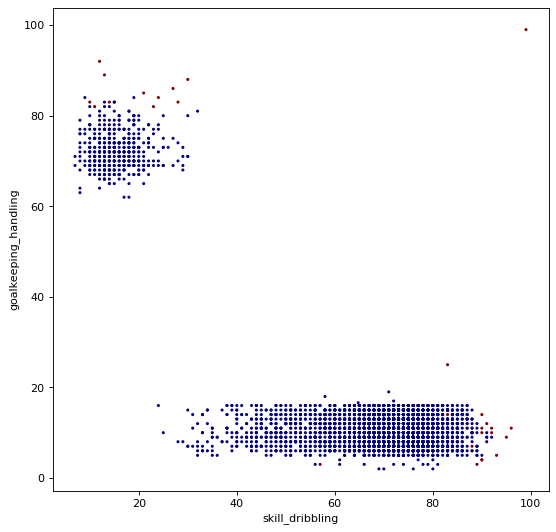

In [29]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [30]:
bool_GK=df_n["player_positions"] == 'GK' #diferenciamos a los arqueros

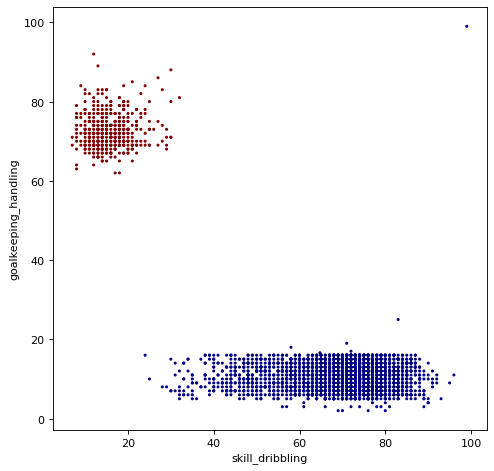

In [31]:
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_GK,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [32]:
#sns.pairplot(df_skills)

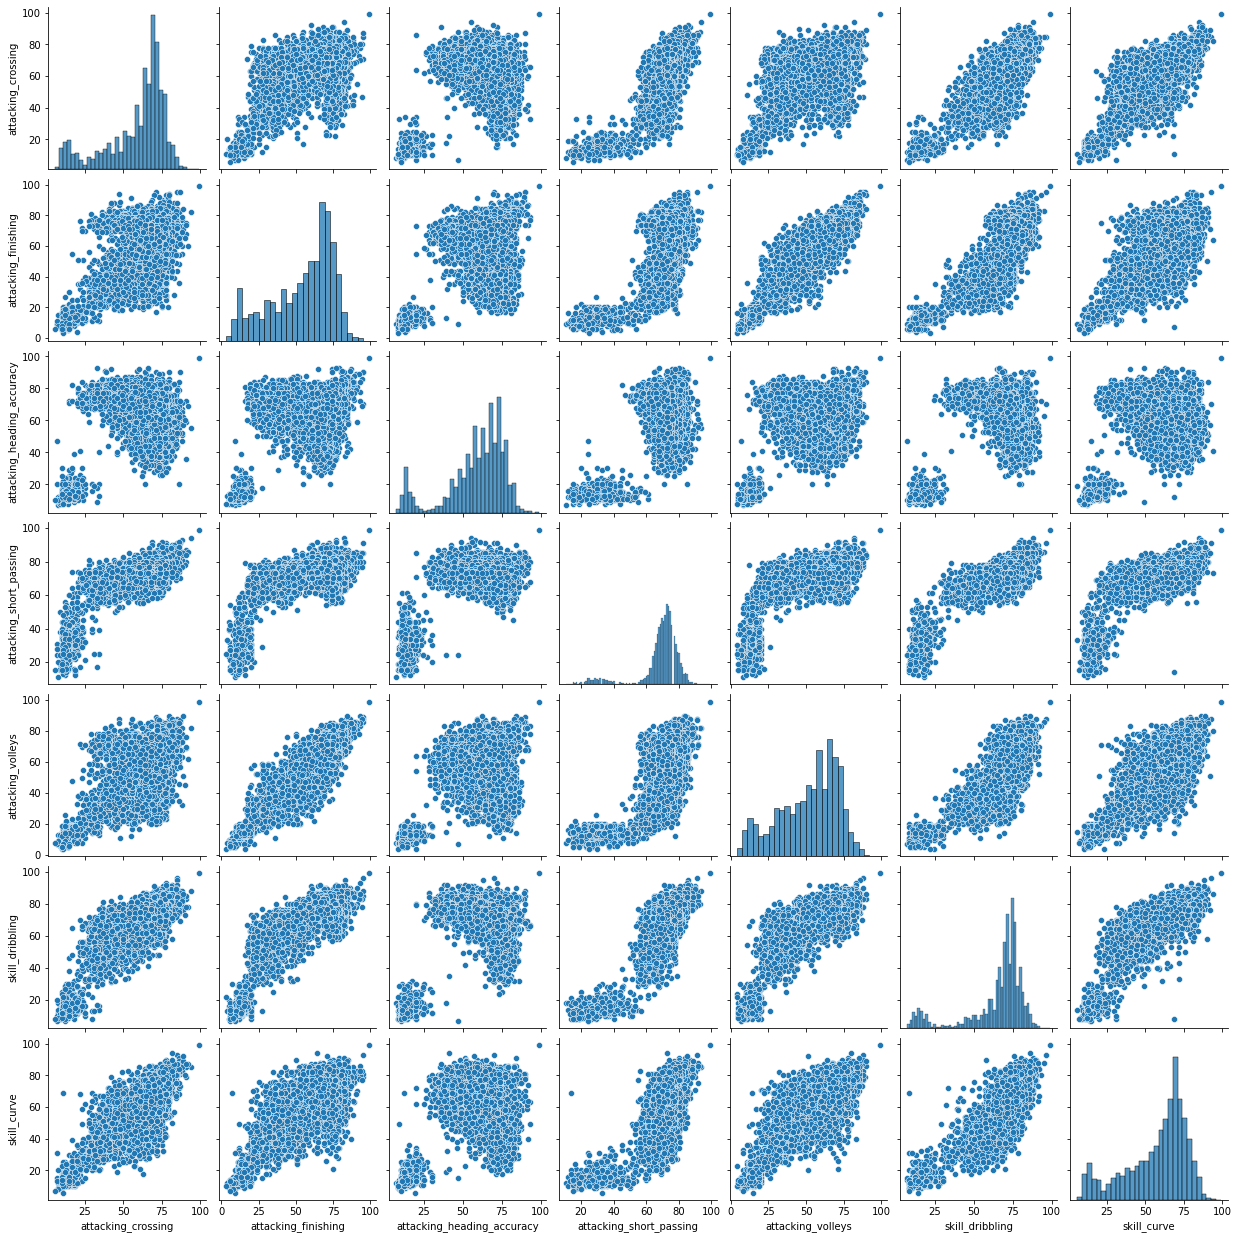

In [33]:
sns.pairplot(df_skills[skills_ratings[0:7]])

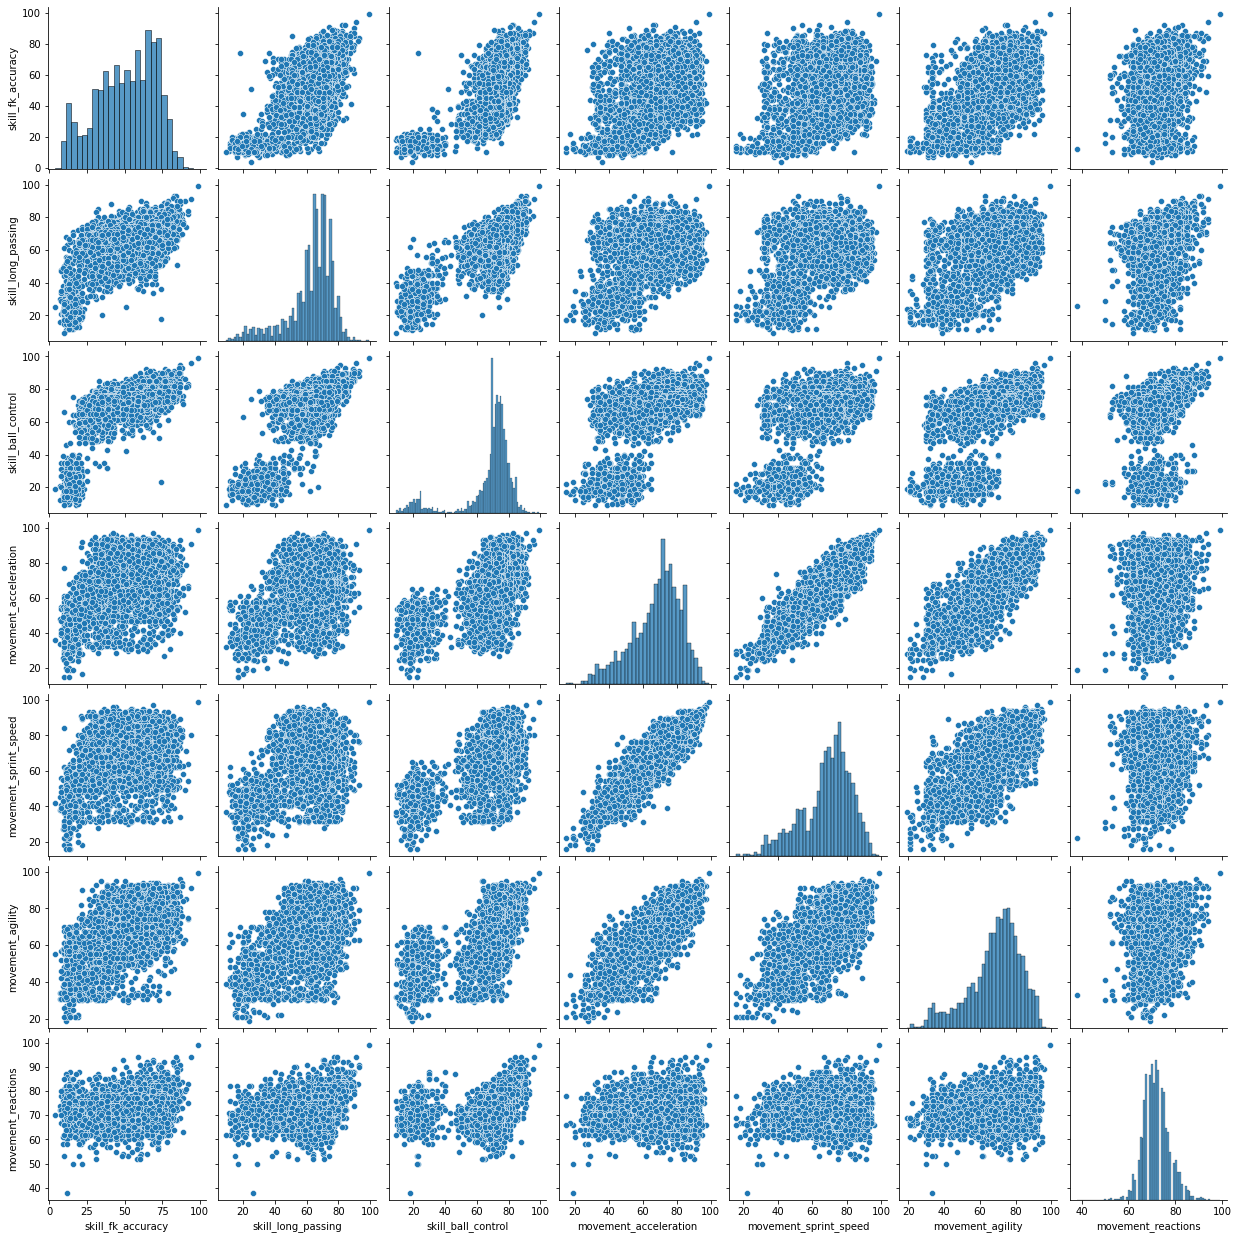

In [34]:
sns.pairplot(df_skills[skills_ratings[7:14]])

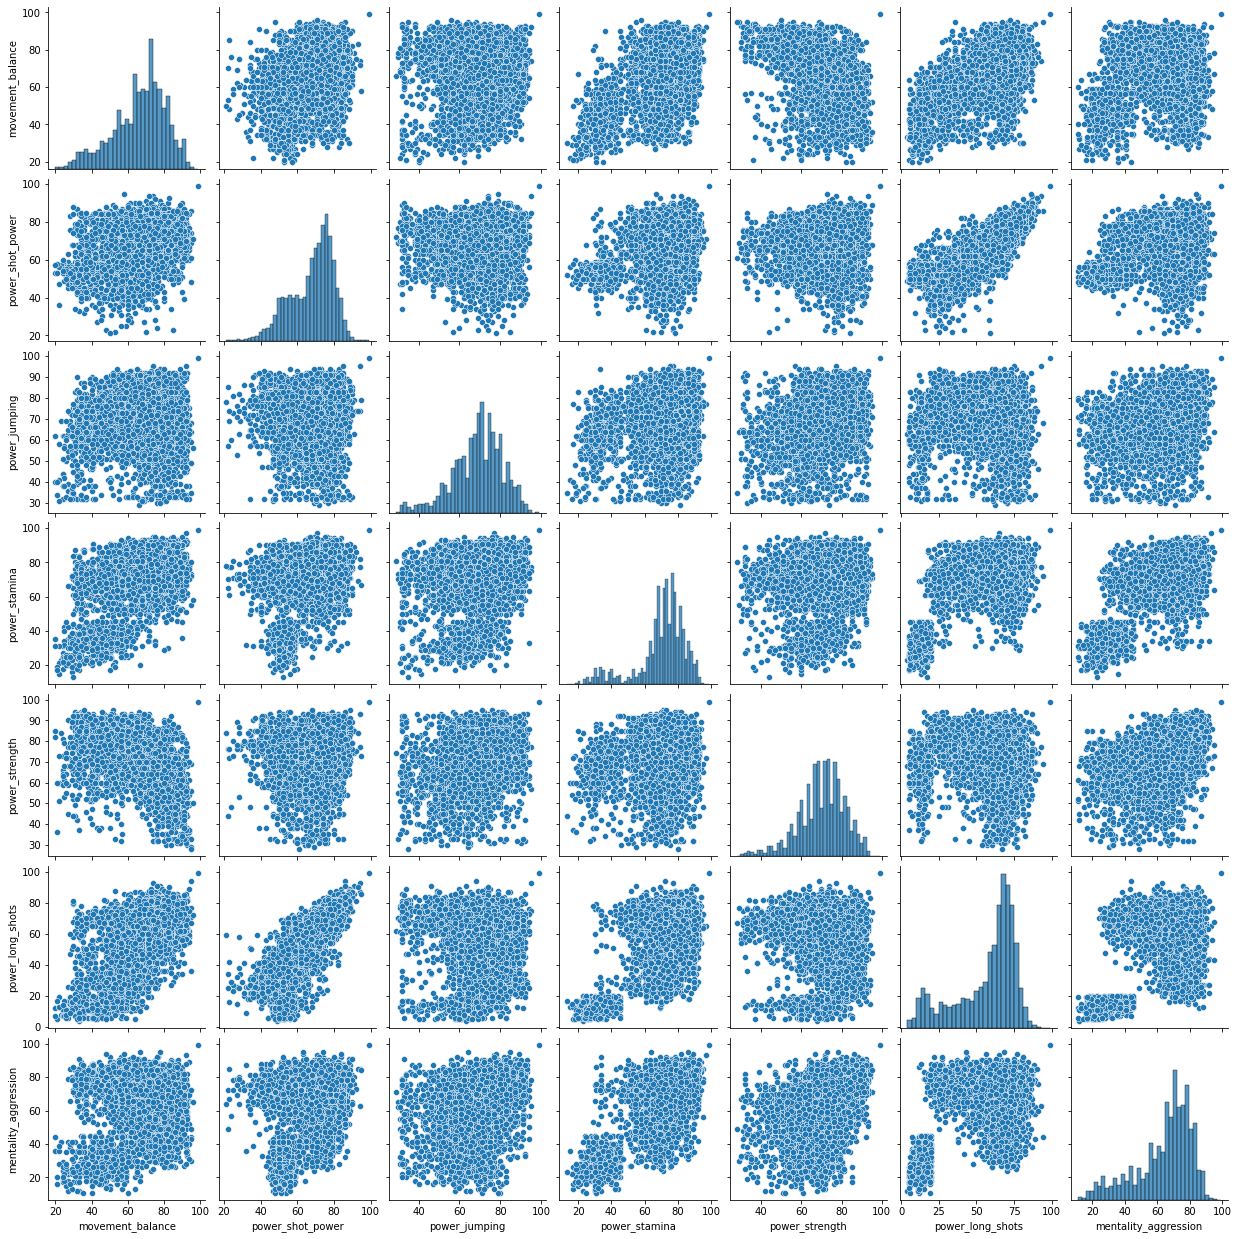

In [35]:
sns.pairplot(df_skills[skills_ratings[14:21]])

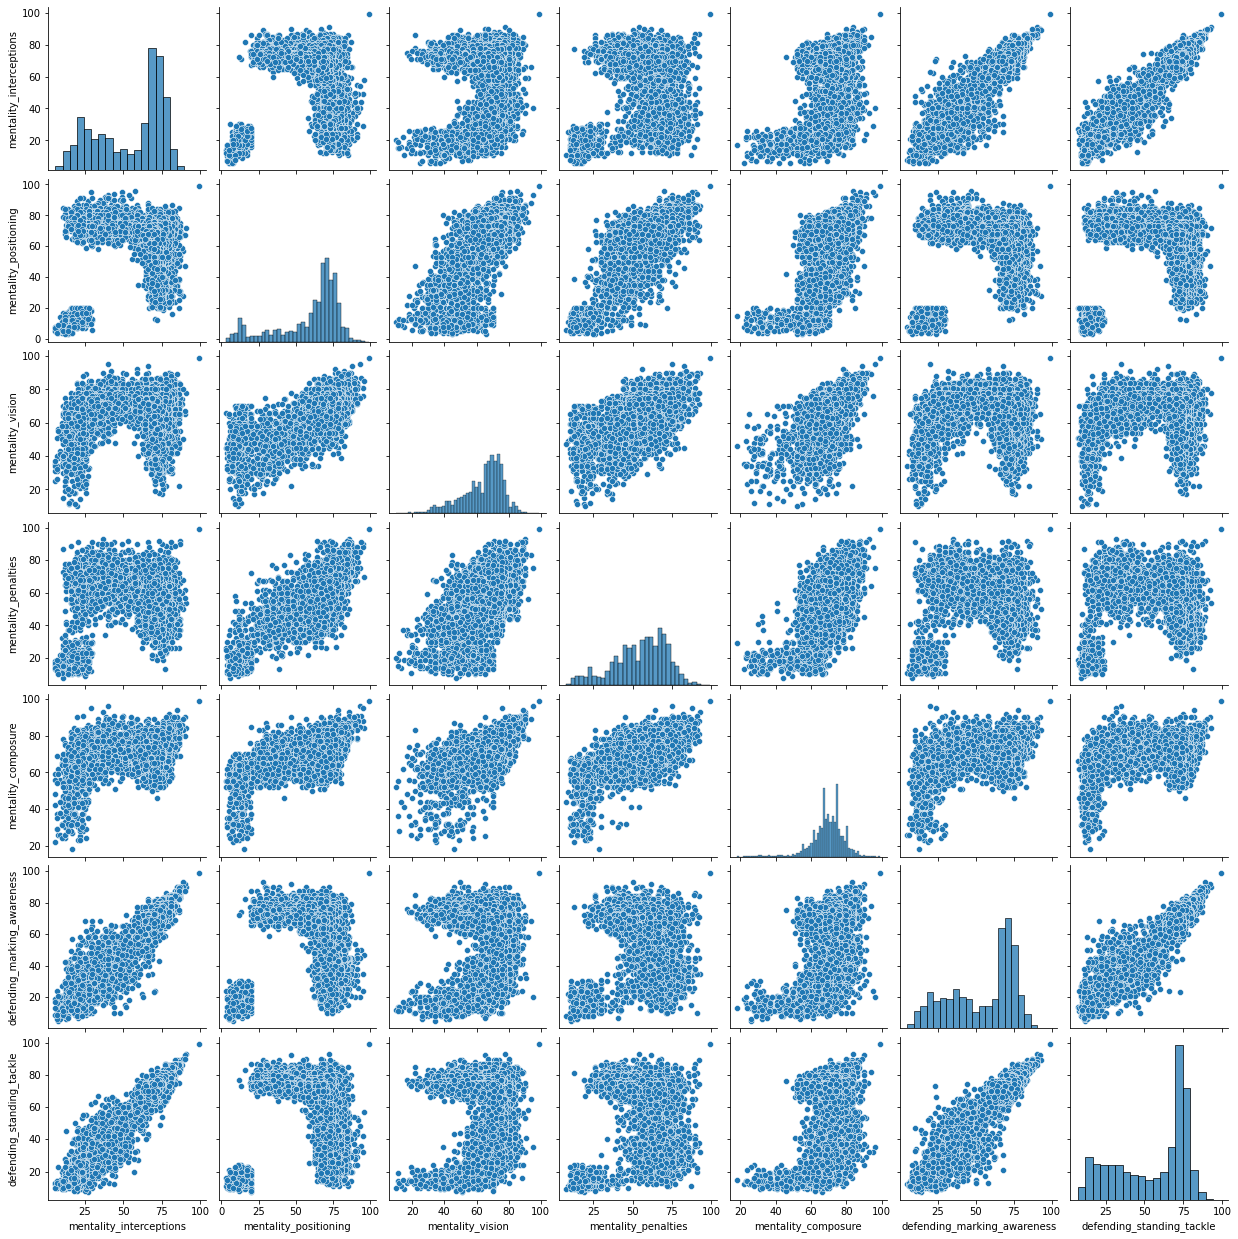

In [36]:
sns.pairplot(df_skills[skills_ratings[21:28]])

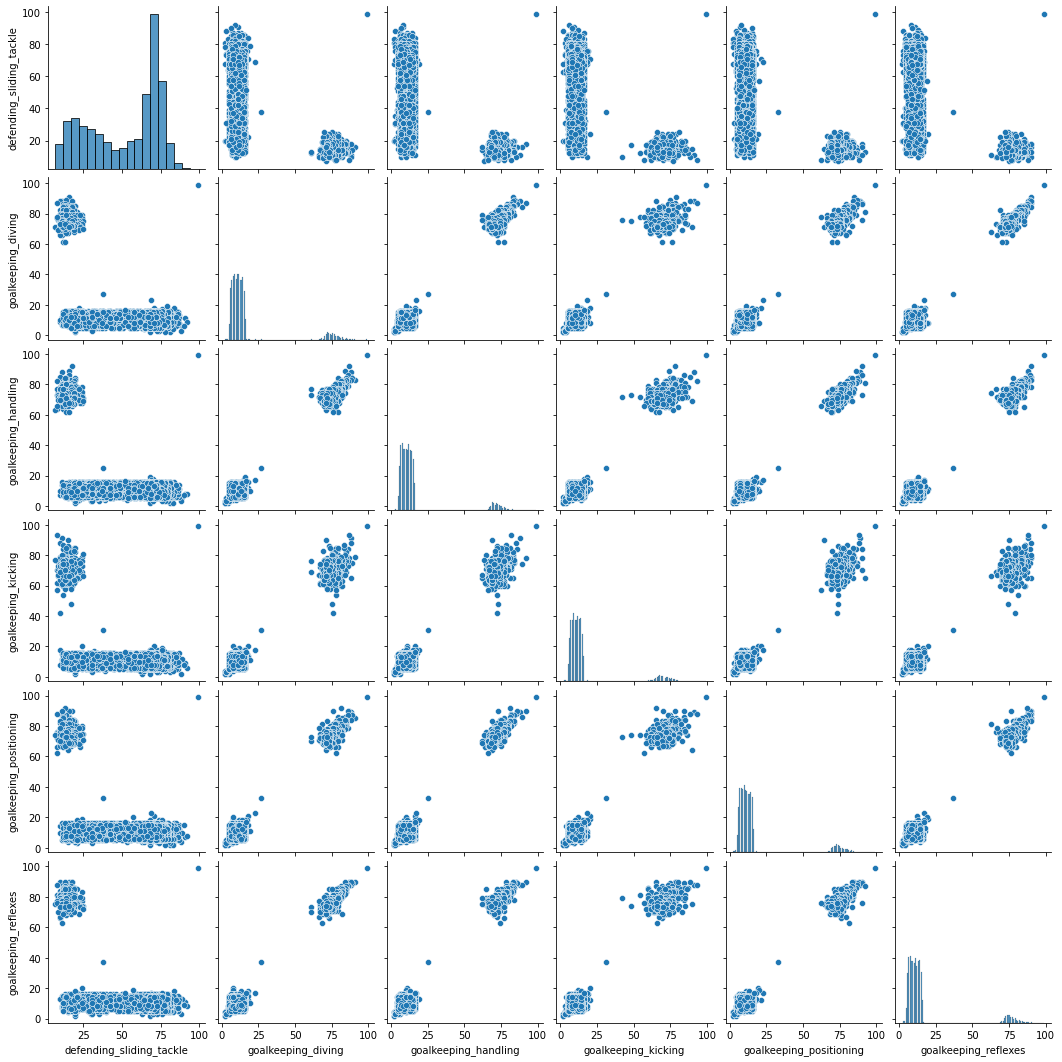

In [37]:
sns.pairplot(df_skills[skills_ratings[28:35]])

In [38]:
df_skills.shape

(4595, 34)

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [39]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[29]

In [40]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'club_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [41]:
#en Jupyter Ntb, abre en la ntb
iplot(fig)

**Consigna de trabajo:** buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios bidimensionales, de a dos variables por vez).

Que siginifica cercanía? cómo se mide? en que espacio/s están buscando? 

Si se encuentran, tratar de explicarlos visualmente.

-----------------------------------------------------
En próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica/variable de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [42]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["club_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack=df_n["overall"] > 85

bool_elecc=df_n["club_position"]=='GK' 

bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["club_name"]=='MachineGun'
#bool_elecc=df_n["Name"]=='JugadorPromedio'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]  #6 , 2
skill_2=skills_ratings[4]  #25, 4

Gráfica con plotly

In [43]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average players',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'player_positions'],
                         opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [44]:
#En Jupyter ntb
#plot(fig) #abre y muestra en otra pestaña
iplot(fig)  #muestra aquí

**Identifiquemos algunos jugadores por nombre**

In [45]:
print(df_n.loc[0:43,"short_name"])

0              L. Messi
1        R. Lewandowski
2     Cristiano Ronaldo
3             Neymar Jr
4          K. De Bruyne
5              J. Oblak
6             K. Mbappé
7              M. Neuer
8         M. ter Stegen
9               H. Kane
10             N. Kanté
11           K. Benzema
12          T. Courtois
13               H. Son
14             Casemiro
15          V. van Dijk
16              S. Mané
17             M. Salah
18              Ederson
19           J. Kimmich
20              Alisson
21        G. Donnarumma
22         Sergio Ramos
23            L. Suárez
24             T. Kroos
25            R. Lukaku
26             K. Navas
27          R. Sterling
28      Bruno Fernandes
29           E. Haaland
30            S. Agüero
31            H. Lloris
32            L. Modrić
33          Á. Di María
34          W. Szczęsny
35            T. Müller
36          C. Immobile
37             P. Pogba
38          M. Verratti
39           Marquinhos
40          L. Goretzka
41            P.

## Estandarizamos los datos

In [46]:
df_skills_completo=df[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [47]:
# DF con primeros 10000 jugadores y overal > a 70
df_stdscaler = df_skills_completo.copy()
col_names = df_skills_completo.columns

In [48]:
df_stdscaler = df_stdscaler[col_names]

stdscaler = StandardScaler()
df_stdscaler = stdscaler.fit_transform(df_stdscaler)
df_stdscaler




array([[ 1.96418991,  2.49007589,  1.05333669, ..., -0.06371338,
        -0.13067765, -0.47481763],
       [ 1.18788679,  2.49007589,  2.20982499, ..., -0.2448277 ,
        -0.48239123, -0.36298813],
       [ 2.07509035,  2.49007589,  2.20982499, ..., -0.06371338,
        -0.13067765, -0.30707338],
       ...,
       [-0.58652034, -0.70456764, -0.50792252, ..., -0.54668491,
        -0.36515337, -0.58664713],
       [-1.14102257,  0.15747903, -0.68139577, ..., -0.54668491,
        -0.13067765, -0.08341438],
       [-0.58652034, -0.70456764, -0.33444928, ..., -0.18445626,
        -0.4237723 , -0.13932913]])

In [49]:
# Tranformamos la matriz en un DF
df_stdscaler = pd.DataFrame(df_stdscaler, columns= col_names)
df_stdscaler

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                1.964190             2.490076                    1.053337   
1                1.187887             2.490076                    2.209825   
2                2.075090             2.490076                    2.209825   
3                1.964190             1.881572                    0.648566   
4                2.463242             1.830864                    0.185970   
...                   ...                  ...                         ...   
19234           -0.198369            -0.704568                   -0.218800   
19235            0.245233            -0.653859                   -0.334449   
19236           -0.586520            -0.704568                   -0.507923   
19237           -1.141023             0.157479                   -0.681396   
19238           -0.586520            -0.704568                   -0.334449   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
0                     2.217457           2.579532         2.147538   
1                     1.803392           2.636180         1.561936   
2                     1.458338           2.466236         1.721646   
3                     1.872403           2.466236         2.094301   
4                     2.424490           2.239644         1.721646   
...                        ...                ...              ...   
19234                -0.611986          -0.706052        -0.567524   
19235                -0.542976          -0.592756        -0.780470   
19236                -0.680997          -0.309516        -0.461051   
19237                -1.440116          -0.479460        -0.727234   
19238                -0.611986          -0.309516        -0.407815   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0         2.515375           3.012606            2.524112            2.252136   
1         1.745324           2.488684            1.126551            1.772039   
2         1.855332           2.430471            1.592404            1.772039   
3         2.240357           2.605111            1.858606            2.192124   
4         2.075346           2.372257            2.657213            1.952075   
...            ...                ...                 ...                 ...   
19234    -0.784843          -0.247351           -0.337561           -0.568436   
19235     0.315230          -0.654845           -0.204460           -0.988521   
19236    -0.564829          -0.305564           -0.271010           -0.568436   
19237    -0.619832          -0.480205           -1.335819           -0.808484   
19238    -0.509825          -0.596632           -0.271010           -1.228570   

       movement_acceleration  movement_sprint_speed  movement_agility  \
0                   1.737133               1.021387          1.850364   
1                   0.814077               0.954565          0.908358   
2                   1.341538               1.555967          1.513933   
3                   1.868998               1.622789          2.186795   
4                   0.748144               0.754098          1.042930   
...                      ...                    ...               ...   
19234              -0.570508              -0.315061         -0.571938   
19235              -0.306777              -0.448706          0.033638   
19236              -0.306777              -0.315061         -0.370079   
19237               0.286616               0.152696          0.571927   
19238               0.352549               0.152696          0.100924   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                3.599846          2.159347          2.139433       0.262854   
1                3.489252          1.251806          2.442649       1.665187   
2                3.599846          0.693319          2.745866       2.490088   
3                3.046874          1.391428          1.6846

## Visualizacion-con-embeddings:tSNE


### Con datos de habilidades completos

In [50]:
df.shape

(19239, 110)

In [51]:
arr = df_skills_completo.to_numpy()

In [52]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random', random_state = 15)
df_tsne = arr
X_tsne_all = tsne.fit_transform(arr)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19239 samples in 0.001s...
[t-SNE] Computed neighbors for 19239 samples in 7.405s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19239
[t-SNE] Computed conditional probabilities for sample 2000 / 19239
[t-SNE] Computed conditional probabilities for sample 3000 / 19239
[t-SNE] Computed conditional probabilities for sample 4000 / 19239
[t-SNE] Computed conditional probabilities for sample 5000 / 19239
[t-SNE] Computed conditional probabilities for sample 6000 / 19239
[t-SNE] Computed conditional probabilities for sample 7000 / 19239
[t-SNE] Computed conditional probabilities for sample 8000 / 19239
[t-SNE] Computed conditional probabilities for sample 9000 / 19239
[t-SNE] Computed conditional probabilities for sample 10000 / 19239
[t-SNE] Computed conditional probabilities for sample 11000 / 19239
[t-SNE] Computed conditional probabilities for sample 12000 / 19239
[t-SNE] Computed conditional probabilities for sam

In [53]:
X_tsne_all.shape



(19239, 2)

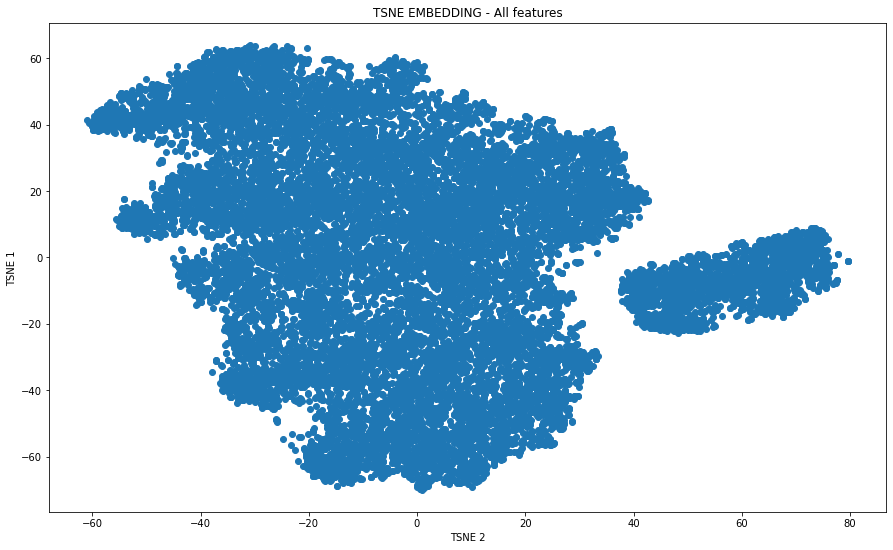

In [54]:
#Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1])
#handles= scatter.legend_elements(prop='colors')
#plt.legend(handles)

### Con datos reducidos: primeros 10.000 jugadores con overall > a 70, escalado

In [55]:
arr2 = df_stdscaler.to_numpy()

In [56]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random', random_state = 15)
df_tsne = arr2
X_tsne_all = tsne.fit_transform(arr2)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19239 samples in 0.001s...
[t-SNE] Computed neighbors for 19239 samples in 6.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19239
[t-SNE] Computed conditional probabilities for sample 2000 / 19239
[t-SNE] Computed conditional probabilities for sample 3000 / 19239
[t-SNE] Computed conditional probabilities for sample 4000 / 19239
[t-SNE] Computed conditional probabilities for sample 5000 / 19239
[t-SNE] Computed conditional probabilities for sample 6000 / 19239
[t-SNE] Computed conditional probabilities for sample 7000 / 19239
[t-SNE] Computed conditional probabilities for sample 8000 / 19239
[t-SNE] Computed conditional probabilities for sample 9000 / 19239
[t-SNE] Computed conditional probabilities for sample 10000 / 19239
[t-SNE] Computed conditional probabilities for sample 11000 / 19239
[t-SNE] Computed conditional probabilities for sample 12000 / 19239
[t-SNE] Computed conditional probabilities for sam

In [57]:
X_tsne_all.shape



(19239, 2)

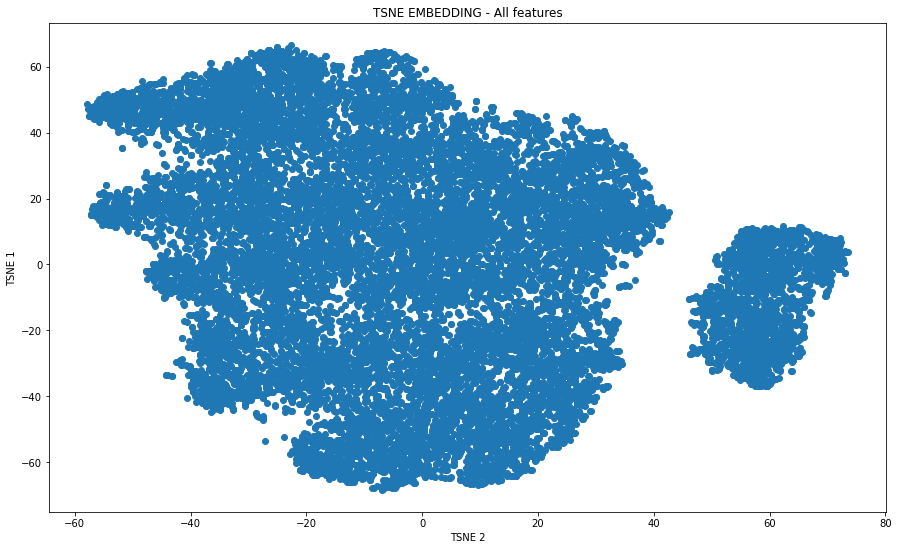

In [58]:
#Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1])
#handles= scatter.legend_elements(prop='colors')
#plt.legend(handles)

### Con datos reducidos: primeros 10.000 jugadores con overall > a 70, sin escalar


In [59]:
arr3 = df_skills.to_numpy()

In [60]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random', random_state = 15)
df_tsne = arr3
X_tsne_all = tsne.fit_transform(arr3)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4595 samples in 0.000s...
[t-SNE] Computed neighbors for 4595 samples in 0.499s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4595
[t-SNE] Computed conditional probabilities for sample 2000 / 4595
[t-SNE] Computed conditional probabilities for sample 3000 / 4595
[t-SNE] Computed conditional probabilities for sample 4000 / 4595
[t-SNE] Computed conditional probabilities for sample 4595 / 4595
[t-SNE] Mean sigma: 14.398203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.930862
[t-SNE] KL divergence after 1000 iterations: 1.797365


In [61]:
X_tsne_all.shape



(4595, 2)

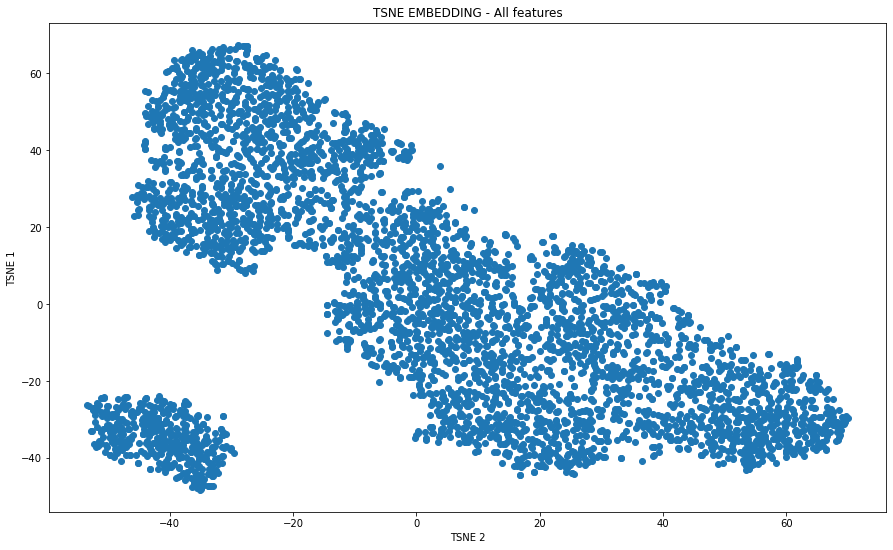

In [62]:
#Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1])
#handles= scatter.legend_elements(prop='colors')
#plt.legend(handles)

Visualizando los datos en dos dimensiones, en todas las posibilidades analizadas (data completa sin escalar, data reducida escalada y sin escalar) se observan al menos dos grupos de datos bastante diferenciados.

## Clustering-con-Kmeans


#### Evaluamos la cantidad de clusters con "elbow method"

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

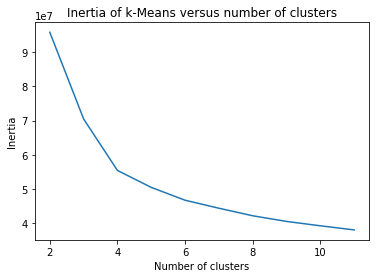

In [63]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters con dataset completo
scores = [KMeans(n_clusters=i).fit(df_skills_completo).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

De acuerdo a la visualización anterior, el número óptimo de clusters sería 4.

### Kmeans con k=4 y data completa


In [64]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_completo) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [65]:
df_clusters=df.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   

   overall  potential    value_eur  wage_eur  age        dob  height_cm  \
0       93         93   78000000.0  320000.0   34 1987-06-24        170   
1       92         92  119500000.0  270000.0   32 1988-08-21        185   
2       91         91   45000000.0  270000.0   36 1985-02-05        187   
3       91         91  129000000.0  270000.0   29 1992-02-05        175   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  #Speedster, #Dribbler, #Playmaker, #FK Special...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1       86

#### Creamos una nueva variable categórica de la base recodificando la posición para simplificar el análisis de los resultados de clustering

In [66]:
# Con arqueros
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:  #delanteros
        return 'Forward'
    
    elif position in midfielders:  #centrocampista
        return 'Midfielder'
    
    elif position in defenders:  #defensores
        return 'Defender'
    
    elif position in goalkeepers:  #arqueros
        return 'GK'
    
    else:
        return 'nan'

In [67]:
df_clusters["Position2"]=df_clusters["player_positions"].apply(lambda x: pos2(x))

df_clusters["Position2"].value_counts()

nan           9809
Defender      3657
Forward       2377
GK            2132
Midfielder    1264
Name: Position2, dtype: int64

In [68]:
df_clusters.shape

(19239, 112)

In [69]:
df_clusters.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url',
       'nation_logo_url', 'nation_flag_url', 'kmeans_4', 'Position2'],
      dtype='object', length=112)

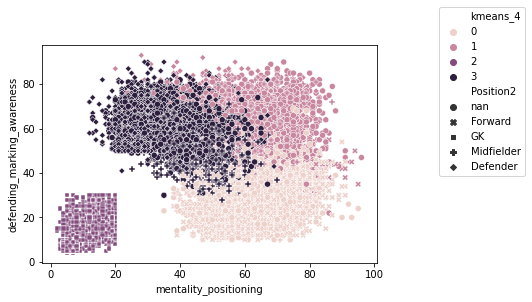

In [70]:
# Visualizamos el resultado en 2 variables
p = sns.scatterplot(data=df_clusters, x='mentality_positioning', y='defending_marking_awareness', hue="kmeans_4", style = 'Position2')
sns.move_legend(p,"upper left", bbox_to_anchor=(1.17, 1.2))

In [71]:
# Análisis de los clusters 

#Se convierte el dataframe en un csv:
#df_clusters.to_csv('cluster_df_kmeans_4.csv', index = False)





In [72]:
# Descargo el csv para analizar clusters
#df_clusters.to_csv('~/Desktop/cluster_df_kmeans_4.csv')

Del análisis de los clústers podemos observar que el cluster 1, que se encuentra bien diferenciado de color rosa, está conformado en un 100% por arqueros, y todos los arqueros están en dicho cluster.
Es el único cluster que se puede diferenciar con exactitud del resto. Vamos a clusterizar a continuación con el set de datos completo, pero sólo teniendo en cuenta los jugadores que no son arqueros, y con overal > a 70.

### Kmeans con data sin arqueros, k=3 y overall > a 70

#### Modificamos los datos: Eliminamos registros de arqueros y overal <= a 70.

In [73]:
# Copiamos el DF para trabajar sobre uno nuevo
df_sin_arqueros = df_clusters.copy()
df_sin_arqueros.shape



(19239, 112)

In [74]:
# Eliminamos la columna de la clusterización anterior
df_sin_arqueros = df_sin_arqueros.drop(columns=['kmeans_4'])
df_sin_arqueros.shape

(19239, 111)

In [75]:
df_sin_arqueros.shape

(19239, 111)

In [76]:
# Eliminamos información de arqueros y de jugadores con overal menor o igual a 70
df_sin_arqueros=df_sin_arqueros[(df_sin_arqueros["Position2"]!='GK')&(df_sin_arqueros['overall']>70)]


In [77]:
df_sin_arqueros.shape

(4149, 111)

In [78]:
# Contamos la cantidad de jugadores en cada una de las categorías definidas manualmente por nosotros
df_sin_arqueros["Position2"].value_counts()

nan           2629
Defender       842
Forward        492
Midfielder     186
Name: Position2, dtype: int64

#### Evaluamos la cantidad de clusters con "elbow method"

In [79]:
# Nos quedamos sólo con variables numéricas para los análisis y overall > a 70
df_skills_sin_arq=df_sin_arqueros[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [80]:
df_skills_sin_arq.shape

(4149, 34)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

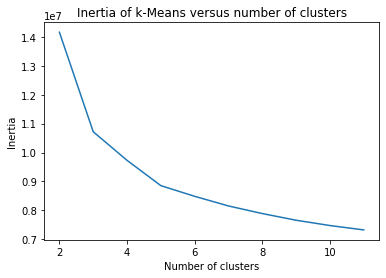

In [81]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters con dataset completo
scores = [KMeans(n_clusters=i).fit(df_skills_sin_arq).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [82]:
# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_sin_arq) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [83]:
df_clusters2=df_sin_arqueros.copy()
df_clusters2['kmeans_3'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters2.head(4)

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   

   overall  potential    value_eur  wage_eur  age        dob  height_cm  \
0       93         93   78000000.0  320000.0   34 1987-06-24        170   
1       92         92  119500000.0  270000.0   32 1988-08-21        185   
2       91         91   45000000.0  270000.0   36 1985-02-05        187   
3       91         91  129000000.0  270000.0   29 1992-02-05        175   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  #Speedster, #Dribbler, #Playmaker, #FK Special...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1       86

In [84]:
# Visualizamos las variables diferenciando los clusters encontrados
#sns.pairplot(df_clusters2, hue='kmeans_3')

## Clustering con DBSCAN 

Este algoritmo funciona tratando de identificar regiones que tienen alta densidad.Como primer paso DBSCAN selecciona un punto dentro del conjunto de datos y trata de determinar si el punto se encuentra o no dentro de una región. Para definir qué es una región lo hace a través de un parámetro llamado **épsilon**: un radio de un círculo a parti de un punto seleccionado. A los elementos clasificados como -1 los considera "ruido" (outliers).<br>
De acuerdo a los análisis que venimos realizando precedentemente, vamos a probar distintos épsilon, y vamos a intentar identificar 4 clusters para el caso de la data completa, y 3 clusters para el caso de la data sin arqueros.

### DBSCAN con data completa

Probamos distintas configuraciones de hiperparámetros.

In [85]:
# Aplicamos DBSCAN con los datos sin estandarizar
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=10, min_samples=5).fit(df_skills_completo)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{-1}

In [86]:
# Aplicamos DBSCAN con los datos estandarizados, cambiamos la distancia
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2, min_samples=2,metric='chebyshev').fit(df_stdscaler)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{0, 1}

In [87]:
 # Aplicamos DBSCAN con los datos sin estandarizar, cambiamos la distancia
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2, min_samples=2,metric='mahalanobis').fit(df_skills_completo) #DF sin escantarizar
# get cluster labels
clusters.labels_
set(clusters.labels_)


{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [89]:
df_clusters3 = df.copy()

In [90]:
#Agregamos los valores de clusters por DBSCAN al df que tiene el cluster kmeans
df_clusters3['DBSCAN_5'] = clusters.labels_ #clusters


In [91]:
# Analizamos la cantidad de registros para cada etiqueta
df_clusters3.groupby('DBSCAN_5')['sofifa_id'].count()

DBSCAN_5
-1     19217
 0         2
 1         2
 2         2
 3         2
 4         2
 5         2
 6         2
 7         2
 8         2
 9         2
 10        2
Name: sofifa_id, dtype: int64

In [92]:
# Aplicamos DBSCAN con los datos estandarizados, cambiamos la distancia
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=3, min_samples=2,metric='chebyshev').fit(df_stdscaler)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{0}

In [93]:
# Aplicamos DBSCAN con los datos estandarizados
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=4, min_samples=1).fit(df_stdscaler)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{0, 1, 2, 3}

Probamos muchas configuraciones de épsilon y min_samples; en la mayoría de los casos nos clasificaba a todos los datos como outliers.

In [94]:
from collections import Counter
Counter(clusters.labels_)

#Agregamos los valores de clusters por DBSCAN al df que tiene el cluster kmeans
df_clusters3['DBSCAN_5'] = clusters.labels_ #clusters


In [95]:
df_clusters3["Position2"]=df_clusters3["player_positions"].apply(lambda x: pos2(x))

df_clusters3["Position2"].value_counts()

nan           9809
Defender      3657
Forward       2377
GK            2132
Midfielder    1264
Name: Position2, dtype: int64

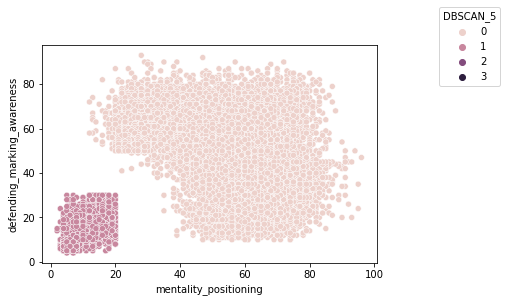

In [96]:
# Visualizamos el resultado en 2 variables
p = sns.scatterplot(data=df_clusters3, x='mentality_positioning', y='defending_marking_awareness', hue="DBSCAN_5")
sns.move_legend(p,"upper left", bbox_to_anchor=(1.17, 1.2))

En este caso, también identifica el algoritmo al 100% de los arqueros en el clúster 1.

In [97]:
# Analizamos la cantidad de registros para cada etiqueta
df_clusters3.groupby('DBSCAN_5')['sofifa_id'].count()

DBSCAN_5
0    17105
1     2132
2        1
3        1
Name: sofifa_id, dtype: int64

En esta última configutación de hiperparámetros, se logra distinguir el grupo conformado por arqueros, pero el resto de los datos están agrupados practicamente todos en el cluster 0. Vamos a probar la clusterización del dataset sin arqueros con MeanShift.

## Clustering con MeanShift

### Con data completa sin arqueros

En este algoritmo, el parámetro mas importante es el **bandwidth**. Para determinarlo, utilizamos stimate_bandwidth.

In [98]:
# Eliminamos información de arqueros y de jugadores con overal menor o igual a 70
df_completo_sin_arq=df_clusters3[(df_clusters3["Position2"]!='GK')]


In [99]:
df_completo_sin_arq.shape

(17107, 112)

In [100]:
# Nos quedamos sólo con variables numéricas para los análisis y overall > a 70
df_completo_sin_arq=df_completo_sin_arq[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [101]:
df_completo_sin_arq.shape

(17107, 34)

In [102]:
bandwidth = estimate_bandwidth(df_completo_sin_arq, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)


In [103]:
bandwidth

81.29859251463888

In [104]:
# Clusterizamos con MeanShift con el dataset sin arqueros
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_completo_sin_arq)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 1


In [105]:
# Clusterizamos con MeanShift con el dataset sin arqueros Y bandwidth =2
ms = MeanShift(bandwidth=3, bin_seeding=True)

ms.fit(df_completo_sin_arq)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 17107


### Con overall > a 70 sin arqueros

In [106]:
bandwidth = estimate_bandwidth(df_skills_sin_arq, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)


In [107]:
bandwidth

77.88875068356654

In [108]:
# df_skills_sin_arq es el DF con overall > a 70 y sin arqueros 
df_skills_sin_arq.shape

(4149, 34)

In [109]:
# Clusterizamos con MeanShift con el dataset sin arqueros
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_skills_sin_arq)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 1


In [110]:
# Clusterizamos con MeanShift con el dataset sin arqueros Y bandwidth =2
ms = MeanShift(bandwidth=35, bin_seeding=True)

ms.fit(df_skills_sin_arq)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 5


In [111]:
df_clusters4=df_sin_arqueros.copy()
df_clusters4['meanshift_5'] = ms.labels_ #clusters
print('MeaanShift encontró: ', max(ms.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters4.head(4)

MeaanShift encontró:  5 clusters, nosotros forzamos la cantidad


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   

   overall  potential    value_eur  wage_eur  age        dob  height_cm  \
0       93         93   78000000.0  320000.0   34 1987-06-24        170   
1       92         92  119500000.0  270000.0   32 1988-08-21        185   
2       91         91   45000000.0  270000.0   36 1985-02-05        187   
3       91         91  129000000.0  270000.0   29 1992-02-05        175   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3  #Speedster, #Dribbler, #Playmaker, #FK Special...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   
3  Injury Prone, Flair, Speed Dribbler (AI), Play...  91.0      83.0     86.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1       86

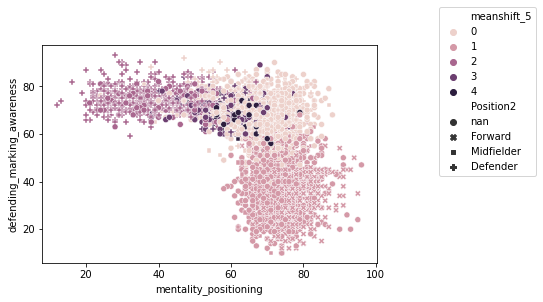

In [112]:
# Visualizamos el resultado en 2 variables
p = sns.scatterplot(data=df_clusters4, x='mentality_positioning', y='defending_marking_awareness', hue="meanshift_5", style = 'Position2')
sns.move_legend(p,"upper left", bbox_to_anchor=(1.17, 1.2))

In [113]:
# Análisis de los clusters 

#Se convierte el dataframe en un csv:
#df_clusters4.to_csv('cluster_df_meanshift_5.csv', index = False)





In [114]:
# Descargo el csv para analizar clusters
#df_clusters4.to_csv('~/Desktop/df_meanshift_5.csv')

In [115]:
df_clusters4["Position2"].value_counts()

nan           2629
Defender       842
Forward        492
Midfielder     186
Name: Position2, dtype: int64

In [116]:
# Inspeccionamos la cantidad de jugadores en cada clúster
df_clusters4["meanshift_5"].value_counts()

0    1551
1    1532
2     733
3     226
4     107
Name: meanshift_5, dtype: int64

Del análisis de los clusters realizados, se puede observar que el 98% de los jugadores clasificados como 'Forward' fueron agrupados en el clúster 1, aunque no sólo hay jugadores de esa categiría dentro de este cluster, también hay un importante números de jugadores sin clasificación ('nan') y el 21% de jugadores clasificados como 'Midfielder'.
De lo probado hasta el momento no se lograron separar el resto de las categorías de jugadores definidos anteriormente.
Respecto a la estandarización de datos, se aplicó StandardScaler a uno de los datasets. No obstante, los datos utilizados para clusterizar están todos en la misma escala, por lo que también probamos algoritmos con los datos sin modificar.